In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('eda_data.csv')
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,R,aws,spark,excel,Average_Revenue (million $),Average_company_size,Job_title,seniority,No. of Competitors,dec_len
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Private,...,0,0,0,1,75.0,750,Data Scientist,NaN,0,2536
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other,...,0,0,0,0,3500.0,10000,Data Scientist,NaN,0,4783
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Private,...,0,0,1,1,300.0,750,Data Scientist,NaN,0,3461
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Other,...,0,0,0,0,750.0,3000,Data Scientist,NaN,3,3883
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Private,...,0,0,0,1,1.0,125,Data Scientist,NaN,3,2728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Public,...,0,1,0,0,10000.0,10000,Other,Senior,3,6162
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Public,...,0,1,1,0,300.0,3000,Data Engineer,Senior,3,6130
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,Other,...,0,0,0,1,1.0,750,Other,NaN,0,3078
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Private,...,0,0,0,1,7.5,25,Manager,NaN,0,1642


In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Average_Salary (K$)', 'job_state', 'same_state', 'Company_age (years)',
       'python', 'R', 'aws', 'spark', 'excel', 'Average_Revenue (million $)',
       'Average_company_size', 'Job_title', 'seniority', 'No. of Competitors',
       'dec_len'],
      dtype='object')

In [4]:
df_model = df[['Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Average_Salary (K$)', 'job_state', 'same_state',
               'Company_age (years)', 'python', 'R', 'aws', 'spark', 'excel', 'Job_title', 'seniority', 'No. of Competitors', 'dec_len']]

In [6]:
df_dum = pd.get_dummies(df_model)

In [17]:
X = df_dum.drop('Average_Salary (K$)', axis = 1)
y = df_dum['Average_Salary (K$)'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear regression

In [58]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(-np.mean(cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 5)))
y_pred_lr = lr.predict(X_test)
print(mean_absolute_error(y_test, y_pred_lr))

132210526.59366827
19.45878535413077


### Lasso regression

In [57]:
lasso = Lasso()
lasso.fit(X_train, y_train)
print(-np.mean(cross_val_score(lasso, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 5)))
y_pred_lasso = lasso.predict(X_test)
print(mean_absolute_error(y_test, y_pred_lasso))

21.201127664789052
23.238527689788253


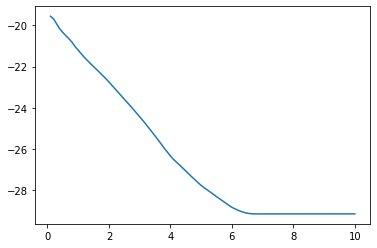

In [38]:
alpha = []
error = []

for i in range(1, 101):
    alpha.append(i/10)
    lasso = Lasso(alpha = i/10)
    error.append(np.mean(cross_val_score(lasso, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 5)))
    
plt.plot(alpha, error)

In [39]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
0,0.1,-19.553541


In [52]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
print(-np.mean(cross_val_score(lasso, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 5)))
y_pred = lasso.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

19.553540975810144
20.41609923823754


### Random forest regression

In [42]:
rfr = RandomForestRegressor()
-np.mean(cross_val_score(rfr, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 5))

13.414208161230594

### Tunning model using GridSearchCV

In [45]:
parameters = {
    'n_estimators': range(10,300,10),
    'criterion': ('mse', 'mae'),
    'max_features': ("auto", "sqrt", "log2")
}
gs = GridSearchCV(rfr, parameters, scoring = 'neg_mean_absolute_error', cv = 5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [54]:
print(gs.best_score_)
gs.best_estimator_

-13.404490012106539


RandomForestRegressor(n_estimators=240)

In [59]:
y_pred_rf = gs.best_estimator_.predict(X_test)
mean_absolute_error(y_test, y_pred_rf)

11.161786912751676

In [60]:
mean_absolute_error(y_test, (y_pred_lr + y_pred_rf)/2)

14.705576153896128

In [71]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

52.66041666666667

In [77]:
y_pred_model = model.predict(X_test)
mean_absolute_error(y_test, y_pred_model)

11.161786912751676

In [94]:
print(round(lr.score(X_test, y_test)*100, 2), '%')
print(round(lr.score(X_test, y_test)*100, 2), '%')
print(round(lr.score(X_test, y_test)*100, 2), '%')
print(round(lr.score(X_test, y_test)*100, 2), '%')


55.77 %
0.3835272357062429
0.7809564470715509
0.7809564470715509


In [87]:
round(1.232323, 2)

1.23